In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('/Users/husazwerg/Desktop/Uni/challenge/tennis_challenge/HD1080_SN35071549_12-01-04.csv')
data.head()

,Frame,Object ID,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Bounding Box X1,Bounding Box Y1,...,Bounding Box Z5,Bounding Box X6,Bounding Box Y6,Bounding Box Z6,Bounding Box X7,Bounding Box Y7,Bounding Box Z7,Bounding Box X8,Bounding Box Y8,Bounding Box Z8
0,0,0,0.706526,0.191217,0.817250,0.917935,0.046710,0.013686,0.450839,0.018730,...,0.651249,0.429567,0.267964,1.114594,0.911712,0.292499,1.121782,0.911712,0.428258,0.658438
1,0,1,-8.568687,-3.632734,13.967793,1.631924,0.083028,0.024327,-8.888227,-4.328464,...,13.854135,-8.971460,-3.017012,14.519424,-8.279177,-2.981785,14.529745,-8.279177,-2.786857,13.864457
2,0,3,-8.705292,-3.860473,15.127709,6.804537,0.346241,0.101448,-9.084500,-4.509847,...,15.013926,-9.160205,-3.348982,15.728068,-8.417083,-3.311168,15.739148,-8.417083,-3.101925,15.025005
3,0,4,-1.651103,-6.542075,24.904566,8.329982,0.423858,0.124190,-1.865556,-7.263681,...,24.922976,-1.945402,-5.970026,25.439709,-1.407702,-5.942665,25.447725,-1.407702,-5.791263,24.930994
4,1,0,0.709247,0.185752,0.837220,0.219175,-0.252135,0.901972,0.460774,0.000949,...,0.680839,0.439348,0.253049,1.143343,0.920615,0.277550,1.150521,0.920615,0.413050,0.688017


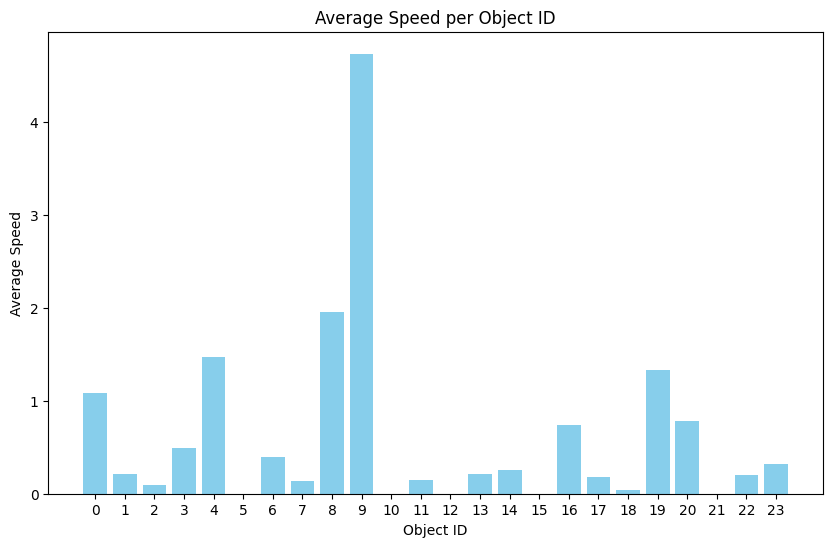

In [28]:
# durchschnittliche Geschwindigkeit
# Berechnung der Geschwindigkeit in jedem Frame
data['Speed'] = np.sqrt(data['Velocity X']**2 + data['Velocity Y']**2 + data['Velocity Z']**2)

# Durchschnittliche Geschwindigkeit pro Objekt-ID berechnen
average_speed_per_object = data.groupby('Object ID')['Speed'].mean().reset_index()

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.bar(average_speed_per_object['Object ID'], average_speed_per_object['Speed'], color='skyblue')
plt.xlabel('Object ID')
plt.ylabel('Average Speed')
plt.title('Average Speed per Object ID')
plt.xticks(average_speed_per_object['Object ID'])
plt.show()

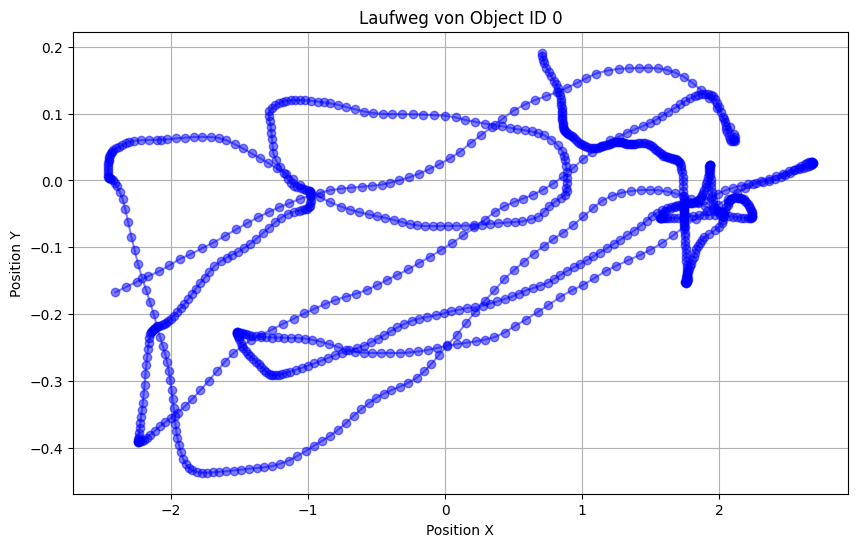

In [29]:
# Laufweg Object ID 0
# Filtern der Daten für Object ID 0
data_object_0 = data[data['Object ID'] == 0]

# Plot des Laufwegs erstellen (Position X vs. Position Y)
plt.figure(figsize=(10, 6))
plt.plot(data_object_0['Position X'], data_object_0['Position Y'], marker='o', linestyle='-', color='b', alpha=0.5)
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Laufweg von Object ID 0')
plt.grid(True)
plt.show()

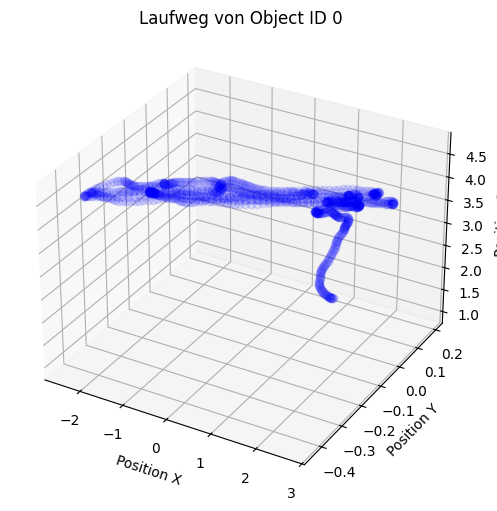

In [30]:
# 3D Plot des Laufwegs erstellen (Position X vs. Position Y vs. Position Z)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data_object_0['Position X'], data_object_0['Position Y'], data_object_0['Position Z'], marker='o', linestyle='-', color='b', alpha=0.1)
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Position Z')
ax.set_title('Laufweg von Object ID 0')
plt.show()

In [31]:
# Frames finden, in denen die Geschwindigkeit 0 ist
frames_with_zero_speed = data_object_0[data_object_0['Speed'] == 0]['Frame']

# Ergebnis anzeigen
print("Frames mit Geschwindigkeit 0 für Object ID 0:")
print(frames_with_zero_speed)

Frames mit Geschwindigkeit 0 für Object ID 0:
Series([], Name: Frame, dtype: int64)


In [32]:
data_object_0.head()

,Frame,Object ID,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Bounding Box X1,Bounding Box Y1,...,Bounding Box X6,Bounding Box Y6,Bounding Box Z6,Bounding Box X7,Bounding Box Y7,Bounding Box Z7,Bounding Box X8,Bounding Box Y8,Bounding Box Z8,Speed
0,0,0,0.706526,0.191217,0.817250,0.917935,0.046710,0.013686,0.450839,0.018730,...,0.429567,0.267964,1.114594,0.911712,0.292499,1.121782,0.911712,0.428258,0.658438,0.919225
4,1,0,0.709247,0.185752,0.837220,0.219175,-0.252135,0.901972,0.460774,0.000949,...,0.439348,0.253049,1.143343,0.920615,0.277550,1.150521,0.920615,0.413050,0.688017,0.961854
8,2,0,0.716185,0.180756,0.859168,0.299344,-0.213217,0.784380,0.475418,-0.003989,...,0.453818,0.251558,1.164315,0.935716,0.276063,1.171493,0.935716,0.411710,0.708376,0.866211
13,3,0,0.723535,0.175098,0.889642,0.273525,-0.227934,0.830215,0.483038,-0.012180,...,0.461163,0.247973,1.197876,0.943746,0.272531,1.205065,0.943746,0.408307,0.741269,0.903342
17,4,0,0.737780,0.168931,0.927173,0.355842,-0.240790,0.889778,0.504070,-0.020383,...,0.481901,0.244266,1.236309,0.965306,0.268902,1.243521,0.965306,0.404908,0.778933,0.988083


In [33]:
# Maximalgeschwindigkeit pro Objekt-ID
# Maximale Geschwindigkeit pro Objekt-ID berechnen
max_speed_per_object = data.groupby('Object ID')['Speed'].max().reset_index()
max_speed_per_object

,Object ID,Speed
0,0,2.354457e+00
1,1,1.634216e+00
2,2,3.192763e-01
3,3,6.814095e+00
4,4,9.277739e+00
5,5,5.911665e-06
6,6,1.139745e+00
7,7,5.014872e+00
8,8,2.953141e+00
9,9,6.197865e+00


In [37]:
# Frames mit maximaler Geschwindigkeit
frames_with_max_speed = data_object_0[data_object_0['Speed'] == max_speed_per_object['Speed'][0]]['Frame']
frames_with_max_speed

4875    932
Name: Frame, dtype: int64

/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_object_0['Position X 1'] = data_object_1['Position X'].values
/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_object_0['Position Y 1'] = data_object_1['Position Y'].values
/var/folders/0l/jk3grg717z34yf9xh85kj0bh0000gn/T/ipykernel_39168/640359845.py:9: SettingWithCopyWarning: 
A value is trying 

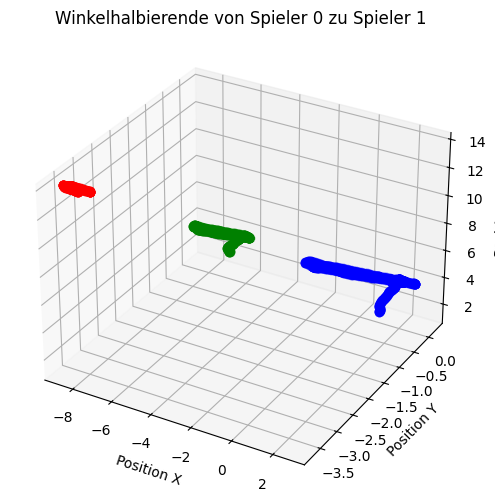

In [4]:
# Winkelhalbierende
def winkelhalbierende():